In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
Base = automap_base()

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn=engine.connect()

In [7]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# We can view all of the classes that automap found
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
data_stream = Session(engine)

# Exploratory Climate Analysis

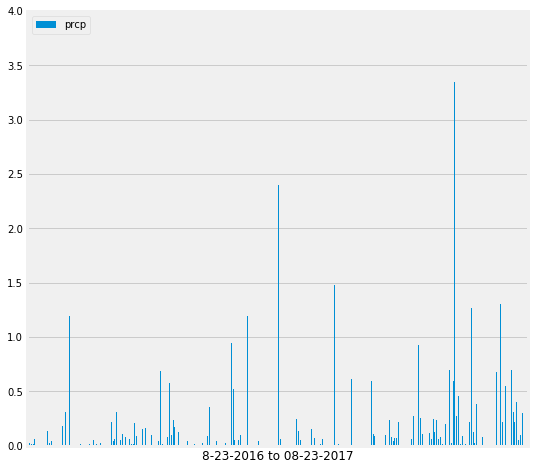

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_df = pd.read_sql('SELECT date, prcp FROM measurement',conn)
precip_df.head()
precip_df['date']= pd.to_datetime(precip_df['date'])

# Calculate the date 1 year ago from the last data point in the 
max_dt = precip_df['date'].max()
max_yr = max_dt.year
max_yr_minus = max_yr - 1
min_dt = dt.date(max_yr_minus,max_dt.month,max_dt.day)

# Perform a query to retrieve the data and precipitation scores
lst_yr_precip = pd.read_sql('SELECT date, prcp FROM measurement WHERE date BETWEEN "'+str(min_dt)+'" AND "'+str(max_dt)+'"',conn)
lst_yr_precip['date']=pd.to_datetime(lst_yr_precip['date'])

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
lst_yr_precip.set_index('date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
my_fig = lst_yr_precip.plot.bar(rot=0,figsize=(8,8),xlim=(min_dt,max_dt),ylim=(0,4))
plt.xticks(ticks=[])
plt.xlabel('8-23-2016 to 08-23-2017')
my_fig

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lst_yr_precip.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [79]:
# Design a query to show how many stations are available in this dataset?
station_df = pd.read_sql('SELECT station, COUNT(station) as station_count FROM measurement GROUP BY station ORDER BY station_count DESC',conn)
station_count = len(station_df)
station_count

9

In [82]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_df_sorted = pd.read_sql('SELECT station, COUNT(station) as station_count FROM measurement GROUP BY station ORDER BY station_count DESC',conn)

# List the stations and the counts in descending order.
station_df_sorted.head(9)


,station,station_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [84]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
USC_281_df = pd.read_sql('SELECT MAX(tobs) as max,MIN(tobs) as min, AVG(tobs) as average FROM measurement WHERE station="USC00519281"',conn)

,max,min,average
0,85.0,54.0,71.663781


Text(0, 0.5, 'Frequency')

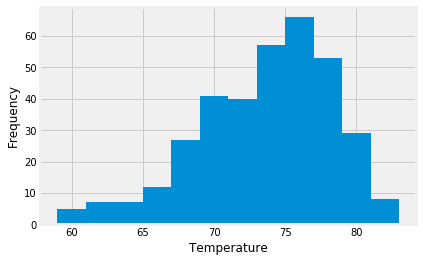

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_12_mo = pd.read_sql('SELECT * FROM measurement WHERE station="USC00519281" AND date BETWEEN "'+str(min_dt)+'" AND "'+str(max_dt)+'"',conn)
station_12_mo['tobs'].hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')